In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors as mpl_colors
import sys
from processing_comisiones import *

#paqueteria para ML
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

In [3]:
df = process_comissions_df()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211493 entries, 0 to 211492
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   EDAD                     211493 non-null  int64 
 1   PLAN DE LA POLIZA        211493 non-null  object
 2   MODALIDAD DE LA POLIZA   211493 non-null  object
 3   MONEDA                   211493 non-null  object
 4   ENTIDAD                  211493 non-null  object
 5   SEXO                     211493 non-null  object
 6   FORMA DE VENTA           211493 non-null  object
 7   TIPO DIVIDENDO           211493 non-null  object
 8   NUMERO DE ASEGURADOS     211493 non-null  int64 
 9   PRIMA CEDIDA             211493 non-null  int64 
 10  COMISIONES DIRECTAS      211493 non-null  int64 
 11  FONDO DE INVERSIÓN       211493 non-null  int64 
 12  FONDO DE ADMINISTRACION  211493 non-null  int64 
 13  MONTO DE DIVIDENDOS      211493 non-null  int64 
 14  MONTO DE RESCATE    

In [4]:
df

,EDAD,PLAN DE LA POLIZA,MODALIDAD DE LA POLIZA,MONEDA,ENTIDAD,SEXO,FORMA DE VENTA,TIPO DIVIDENDO,NUMERO DE ASEGURADOS,PRIMA CEDIDA,COMISIONES DIRECTAS,FONDO DE INVERSIÓN,FONDO DE ADMINISTRACION,MONTO DE DIVIDENDOS,MONTO DE RESCATE
0,0,Temporal,Tradicional,Nacional,Morelos,Masculino,Agentes Persona Física,Sin dividendo,1,0,275,0,0,0,0
1,0,Temporal,Tradicional,Nacional,Veracruz,Femenino,Agentes Persona Física,Sin dividendo,1,0,192,0,0,0,0
2,0,Temporal,Tradicional,Nacional,Veracruz,Masculino,Agentes Persona Física,Sin dividendo,1,0,192,0,0,0,0
3,0,Temporal,Deudores,Nacional,Chihuahua,Femenino,Agentes Persona Física,Sin dividendo,2,105,51,0,0,0,0
4,0,Temporal,Deudores,Nacional,Chihuahua,Femenino,Agentes Persona Moral,Sin dividendo,3,270,131,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211488,121,Temporal,Tradicional,Nacional,Nuevo Leon,Masculino,Red de Sucursales Bancarias,Sin dividendo,1,0,1098,0,0,0,0
211489,121,Temporal,Tradicional,Nacional,Querétaro,Femenino,Red de Sucursales Bancarias,Sin dividendo,1,0,1271,0,0,0,0
211490,121,Temporal,Tradicional,Nacional,Tamaulipas,Femenino,Red de Sucursales Bancarias,Sin dividendo,2,1473,3236,0,0,0,0
211491,121,Temporal,Tradicional,Nacional,Tamaulipas,Masculino,Red de Sucursales Bancarias,Sin dividendo,1,0,1618,0,0,0,0


In [5]:
df = df.apply(pd.to_numeric, downcast='integer', errors='ignore')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211493 entries, 0 to 211492
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   EDAD                     211493 non-null  int8  
 1   PLAN DE LA POLIZA        211493 non-null  object
 2   MODALIDAD DE LA POLIZA   211493 non-null  object
 3   MONEDA                   211493 non-null  object
 4   ENTIDAD                  211493 non-null  object
 5   SEXO                     211493 non-null  object
 6   FORMA DE VENTA           211493 non-null  object
 7   TIPO DIVIDENDO           211493 non-null  object
 8   NUMERO DE ASEGURADOS     211493 non-null  int32 
 9   PRIMA CEDIDA             211493 non-null  int32 
 10  COMISIONES DIRECTAS      211493 non-null  int32 
 11  FONDO DE INVERSIÓN       211493 non-null  int32 
 12  FONDO DE ADMINISTRACION  211493 non-null  int32 
 13  MONTO DE DIVIDENDOS      211493 non-null  int32 
 14  MONTO DE RESCATE    

In [7]:
df[['EDAD']] = df[['EDAD']].astype('int32')

In [8]:
df['PLAN DE LA POLIZA'], cat_Plan = pd.factorize(df['PLAN DE LA POLIZA'])
df['MODALIDAD DE LA POLIZA'], cat_Modalidad = pd.factorize(df['MODALIDAD DE LA POLIZA'])
df['MONEDA'], cat_Moneda = pd.factorize(df['MONEDA'])
df['ENTIDAD '], cat_ENTIDAD = pd.factorize(df['ENTIDAD '])
df['SEXO'], cat_SEXO = pd.factorize(df['SEXO'])
df['FORMA DE VENTA'], cat_Forma = pd.factorize(df['FORMA DE VENTA'])
df['TIPO DIVIDENDO'], cat_Dividendo = pd.factorize(df['TIPO DIVIDENDO'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211493 entries, 0 to 211492
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   EDAD                     211493 non-null  int32
 1   PLAN DE LA POLIZA        211493 non-null  int64
 2   MODALIDAD DE LA POLIZA   211493 non-null  int64
 3   MONEDA                   211493 non-null  int64
 4   ENTIDAD                  211493 non-null  int64
 5   SEXO                     211493 non-null  int64
 6   FORMA DE VENTA           211493 non-null  int64
 7   TIPO DIVIDENDO           211493 non-null  int64
 8   NUMERO DE ASEGURADOS     211493 non-null  int32
 9   PRIMA CEDIDA             211493 non-null  int32
 10  COMISIONES DIRECTAS      211493 non-null  int32
 11  FONDO DE INVERSIÓN       211493 non-null  int32
 12  FONDO DE ADMINISTRACION  211493 non-null  int32
 13  MONTO DE DIVIDENDOS      211493 non-null  int32
 14  MONTO DE RESCATE         211493 non-

<AxesSubplot: >

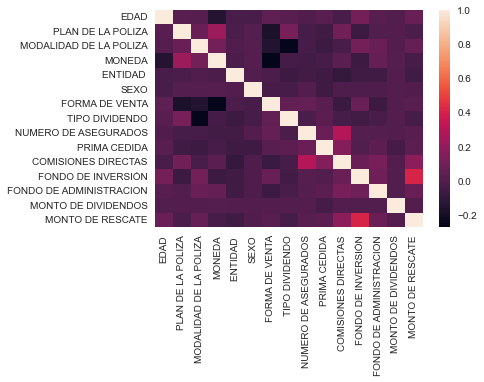

In [11]:
sns.heatmap(df.corr())

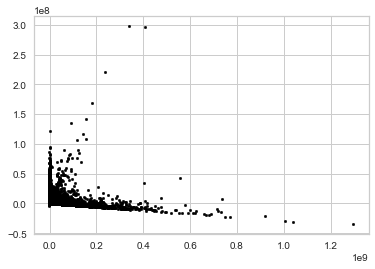

In [12]:
pca = PCA(n_components = 2) 
Xshort = pca.fit_transform(df)
plt.scatter(Xshort[:,0], Xshort[:,1], c='black', s=7)
plt.show()

In [15]:
rescaleX = StandardScaler().fit_transform(df)
column_names = ['FONDO DE INVERSIÓN', 'MONTO DE RESCATE', 'COMISIONES DIRECTAS', 'NUMERO DE ASEGURADOS']
Xescaled = pd.DataFrame(data=rescaleX, columns=column_names)
Xescaled

ValueError: Shape of passed values is (211493, 15), indices imply (211493, 4)

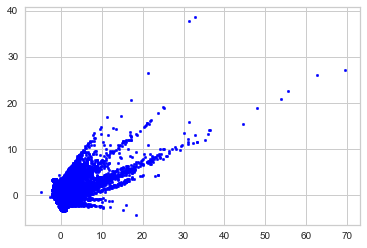

In [18]:
pca = PCA(n_components = 2) 
Xescaled_short = pca.fit_transform(Xescaled)
plt.scatter(Xescaled_short[:,0], Xescaled_short[:,1], c='blue', s=7)
plt.show()

In [19]:
K = 5
kmeans_gral = KMeans(n_clusters=K, random_state=0, n_init=50).fit(Xescaled)
kmeans_gral.labels_ 

array([1, 2, 1, ..., 2, 1, 1], dtype=int32)

In [20]:
kmeans_gral.cluster_centers_

array([[ 1.06774385e-01,  1.71627670e-01, -1.16590192e-01,
         1.34571709e-01, -8.80734077e-01, -2.52587270e-01,
        -3.28633086e-01, -1.46302318e-01,  2.71671300e+00,
         4.36042744e+00,  5.91143731e+00,  5.84716649e-01,
         3.65516756e+00, -1.84672758e-01,  1.14567807e+00],
       [ 2.22606691e-02, -1.93438884e-02,  1.29831857e-01,
         3.11948816e-02,  3.95927936e-02, -9.35310097e-01,
        -1.20959573e-02, -3.89364470e-01, -2.43834992e-02,
        -3.14488429e-02, -5.27663082e-02, -2.89740117e-02,
        -2.57398365e-02, -9.26528744e-04, -2.97881866e-02],
       [-2.15007718e-02, -9.19208605e-03,  1.18188739e-01,
         3.65333516e-02,  2.95504700e-02,  1.06916412e+00,
        -3.70625306e-02, -3.89364470e-01, -2.37844215e-02,
        -9.03367106e-02, -6.33212258e-02, -3.61377580e-02,
        -3.49428110e-02, -9.26528744e-04, -3.81160654e-02],
       [ 1.08372000e+00, -8.34683014e-01,  8.21931214e-01,
        -7.21258609e-01, -7.50460264e-01, -1.60648632

In [21]:
pca = PCA(n_components = 2) 
Xcenters = pca.fit_transform(kmeans_gral.cluster_centers_)
Xcenters

array([[-3.12730009,  6.70654196],
       [-3.15877038, -2.09229614],
       [-3.18320939, -2.19494839],
       [12.90986064, -0.05788727],
       [-3.44058078, -2.36141016]])

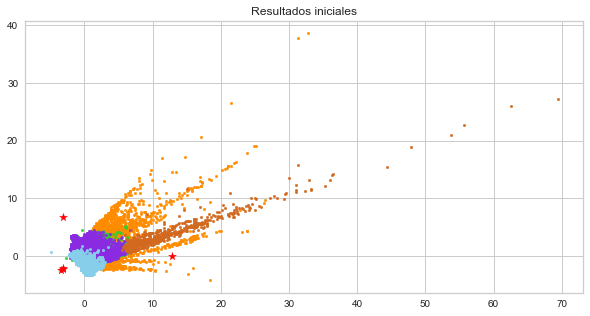

In [22]:
colors = ['darkorange', 'limegreen', 'blueviolet', 'chocolate', 'skyblue', 'tab:pink', 'tab:orange'] #ver más en: https://matplotlib.org/stable/gallery/color/named_colors.html
fig, ax = plt.subplots(figsize=(10, 5))


for i in range(K):
  points = np.array([Xescaled_short[j] for j in range (len(Xescaled_short)) if kmeans_gral.labels_[j] == i]) 
  ax.scatter(points[:,0], points[:,1], s=7, c = colors[i])


ax.scatter(Xcenters[:,0], Xcenters[:,1], marker='*',s=70, c='red')

plt.title("Resultados iniciales")
plt.show()

In [23]:
K = 5
kmeans_gral = KMeans(n_clusters=K, random_state=0, n_init=50).fit(Xescaled)
kmeans_gral.labels_ 

array([1, 2, 1, ..., 2, 1, 1], dtype=int32)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


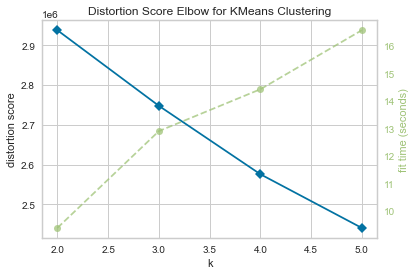

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
visualizer = KElbowVisualizer(kmeans_gral, k=(2,6))
visualizer.fit(Xescaled)  
visualizer.show()       